In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import interpolate

In [2]:
os.chdir("C:\\Users\\User\\Desktop")

In [34]:
data = pd.read_csv('flights.csv',low_memory=False)

In [35]:
data_airlines = pd.read_csv('airlines.csv',low_memory=False)

In [36]:
data_airports = pd.read_csv('airports.csv',low_memory=False)

In [6]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
cleanup_names= {"CANCELLED": {0: "No", 1: "Yes"},"DIVERTED": {0: "No", 1: "Yes"},"CANCELLATION_REASON":  {"B": "Weather","A": "Airline/Carrier","C":"National Air System","D":"Security"},
"MONTH": {1: "January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}, 
 "DAY_OF_WEEK":{1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday",7:"Sunday"}}

In [38]:
data = data.replace(cleanup_names)

In [8]:
data_airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [9]:
airlines_dict = data_airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()
data['AIRLINE'] = data['AIRLINE'].replace(airlines_dict)

In [10]:
data['AIRLINE'].value_counts()

Southwest Airlines Co.          1261855
Delta Air Lines Inc.             875881
American Airlines Inc.           725984
Skywest Airlines Inc.            588353
Atlantic Southeast Airlines      571977
United Air Lines Inc.            515723
American Eagle Airlines Inc.     294632
JetBlue Airways                  267048
US Airways Inc.                  198715
Alaska Airlines Inc.             172521
Spirit Air Lines                 117379
Frontier Airlines Inc.            90836
Hawaiian Airlines Inc.            76272
Virgin America                    61903
Name: AIRLINE, dtype: int64

In [11]:
data_airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [53]:
airports_dict = data_airports.set_index('IATA_CODE')['AIRPORT'].to_dict()
data['ORIGIN_AIRPORT'] = data['ORIGIN_AIRPORT'].replace(airports_dict)
data['DESTINATION_AIRPORT'] = data['DESTINATION_AIRPORT'].replace(airports_dict)

In [58]:
data['ORIGIN_AIRPORT'].value_counts().head()

Hartsfield-Jackson Atlanta International Airport    346836
Chicago O'Hare International Airport                285884
Dallas/Fort Worth International Airport             239551
Denver International Airport                        196055
Los Angeles International Airport                   194673
Name: ORIGIN_AIRPORT, dtype: int64

In [14]:
data['DESTINATION_AIRPORT'].value_counts().head()

Hartsfield-Jackson Atlanta International Airport    346904
Chicago O'Hare International Airport                285906
Dallas/Fort Worth International Airport             239582
Denver International Airport                        196010
Los Angeles International Airport                   194696
Name: DESTINATION_AIRPORT, dtype: int64

In [16]:
data.describe()

,YEAR,DAY,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,...,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,5.819073e+06,5.714008e+06,...,5.726566e+06,5.726566e+06,5.819079e+06,5.726566e+06,5.714008e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,1.570459e+01,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,1.416859e+02,1.370062e+02,...,1.471469e+03,7.434971e+00,1.493808e+03,1.476491e+03,4.407057e+00,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,8.783425e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,7.521058e+01,7.421107e+01,...,5.221879e+02,5.638548e+00,5.071647e+02,5.263197e+02,3.927130e+01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,1.800000e+01,1.400000e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,8.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,8.500000e+01,8.200000e+01,...,1.054000e+03,4.000000e+00,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,1.600000e+01,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,1.230000e+02,1.180000e+02,...,1.509000e+03,6.000000e+00,1.520000e+03,1.512000e+03,-5.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,2.300000e+01,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,1.730000e+02,1.680000e+02,...,1.911000e+03,9.000000e+00,1.918000e+03,1.917000e+03,8.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,3.100000e+01,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,7.180000e+02,7.660000e+02,...,2.400000e+03,2.480000e+02,2.400000e+03,2.400000e+03,1.971000e+03,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [17]:
data.dtypes

YEAR                     int64
MONTH                   object
DAY                      int64
DAY_OF_WEEK             object
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                object
CANCELLED               object
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [18]:
data['MONTH'].value_counts()

July         520718
August       510536
March        504312
June         503897
May          496993
October      486165
April        485151
December     479230
January      469968
November     467972
September    464946
February     429191
Name: MONTH, dtype: int64

In [19]:
data['DAY_OF_WEEK'].value_counts()

Thursday     872521
Monday       865543
Friday       862209
Wednesday    855897
Tuesday      844600
Sunday       817764
Saturday     700545
Name: DAY_OF_WEEK, dtype: int64

In [20]:
data['ELAPSED_TIME'].mean()

137.00618917579393

In [21]:
data['DISTANCE'].mean()

822.3564947305235

In [22]:
data.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

<AxesSubplot:>

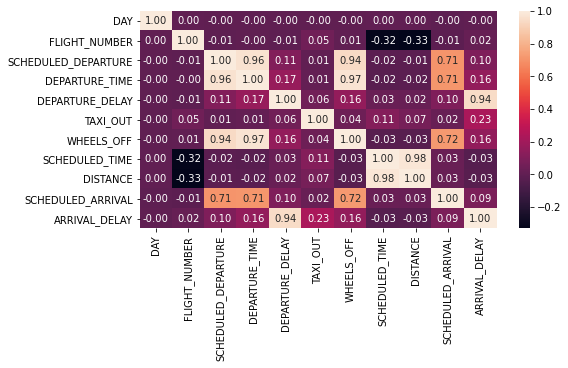

In [39]:
#cancelled_num = cancelled_data[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER','SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
#       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE','WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
#       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED','AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]
#with all these numerical columns our correlation matrix has some white columns and rows

#now we will use only columns that could give the result of correlation
cancelled_num = data[['MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER','SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
                               'DISTANCE','SCHEDULED_ARRIVAL','ARRIVAL_DELAY']]
correlation_mat = cancelled_num.corr()
plt.figure(figsize=(8,4))
sns.heatmap(correlation_mat, annot=True, fmt='.2f')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


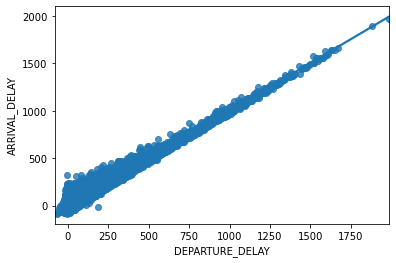

In [41]:
sns.regplot('DEPARTURE_DELAY','ARRIVAL_DELAY', data=data) #  performs linear regression directly in the plot
plt.show()

In [21]:
print(data.DEPARTURE_DELAY.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    5.732926e+06
mean     9.370158e+00
std      3.708094e+01
min     -8.200000e+01
25%     -5.000000e+00
50%     -2.000000e+00
75%      7.000000e+00
85%      2.000000e+01
90%      3.500000e+01
100%     1.988000e+03
max      1.988000e+03
Name: DEPARTURE_DELAY, dtype: float64


In [22]:
print(data.ARRIVAL_DELAY.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    5.714008e+06
mean     4.407057e+00
std      3.927130e+01
min     -8.700000e+01
25%     -1.300000e+01
50%     -5.000000e+00
75%      8.000000e+00
85%      2.000000e+01
90%      3.400000e+01
100%     1.971000e+03
max      1.971000e+03
Name: ARRIVAL_DELAY, dtype: float64


In [23]:
data['DIVERTED'].value_counts()

No     5803892
Yes      15187
Name: DIVERTED, dtype: int64

In [24]:
data['CANCELLED'].value_counts(normalize = True)

No     0.984554
Yes    0.015446
Name: CANCELLED, dtype: float64

In [25]:
grouped = data['DEPARTURE_DELAY'].groupby([data['DAY_OF_WEEK'], data['CANCELLED']]).agg(['min','mean','max'])
grouped

min       mean     max
DAY_OF_WEEK CANCELLED                         
Friday      No        -55.0   9.404951  1988.0
            Yes       -24.0  53.552083   910.0
Monday      No        -61.0  10.821282  1625.0
            Yes       -25.0  62.998778   645.0
Saturday    No        -68.0   7.788214  1878.0
            Yes       -16.0  67.170678  1274.0
Sunday      No        -82.0   9.367854  1670.0
            Yes       -13.0  60.793796   994.0
Thursday    No        -45.0   9.925353  1649.0
            Yes       -21.0  59.320000   645.0
Tuesday     No        -48.0   9.142979  1609.0
            Yes       -23.0  47.762419  1157.0
Wednesday   No        -56.0   8.627734  1589.0
            Yes       -16.0  44.371084   830.0

## CANCELLED

In [42]:
pd.crosstab(data['CANCELLED'],data['CANCELLATION_REASON'],margins=True)

CANCELLATION_REASON,Airline/Carrier,National Air System,Security,Weather,All
CANCELLED,,,,,
Yes,25262,15749,22,48851,89884
All,25262,15749,22,48851,89884


In [60]:
cancelled_data = data[data['CANCELLED']=="Yes"]

In [28]:
data[data['CANCELLED']=="Yes"].describe()

,YEAR,DAY,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,...,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,89884.0,89884.000000,89884.000000,89884.000000,3731.000000,3731.000000,837.000000,837.000000,89879.000000,0.0,...,0.0,0.0,89884.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2015.0,15.456588,2704.677317,1374.989130,1491.904315,57.465559,19.796894,1555.163680,124.976157,NaN,...,NaN,NaN,1525.239831,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,9.323337,1810.926001,499.348424,521.890111,95.535155,14.084055,542.265934,64.645795,NaN,...,NaN,NaN,526.743520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2015.0,1.000000,1.000000,1.000000,1.000000,-25.000000,4.000000,7.000000,20.000000,NaN,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2015.0,7.000000,1110.000000,928.000000,1112.500000,-2.000000,12.000000,1129.000000,79.000000,NaN,...,NaN,NaN,1107.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2015.0,16.000000,2600.000000,1420.000000,1541.000000,21.000000,16.000000,1620.000000,109.000000,NaN,...,NaN,NaN,1603.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2015.0,24.000000,4155.000000,1811.000000,1932.000000,83.000000,23.000000,2032.000000,155.000000,NaN,...,NaN,NaN,1955.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2015.0,31.000000,9855.000000,2359.000000,2400.000000,1274.000000,146.000000,2350.000000,679.000000,NaN,...,NaN,NaN,2359.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cleaning data and linear regression

In [29]:
cancelled_data.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER            14721
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME         86153
DEPARTURE_DELAY        86153
TAXI_OUT               89047
WHEELS_OFF             89047
SCHEDULED_TIME             5
ELAPSED_TIME           89884
AIR_TIME               89884
DISTANCE                   0
WHEELS_ON              89884
TAXI_IN                89884
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME           89884
ARRIVAL_DELAY          89884
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON        0
AIR_SYSTEM_DELAY       89884
SECURITY_DELAY         89884
AIRLINE_DELAY          89884
LATE_AIRCRAFT_DELAY    89884
WEATHER_DELAY          89884
dtype: int64

<AxesSubplot:>

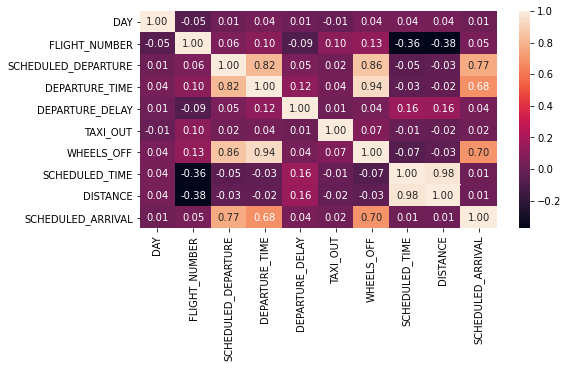

In [44]:
#cancelled_num = cancelled_data[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER','SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
#       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE','WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
#       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED','AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]
#with all these numerical columns our correlation matrix has some white columns and rows

#now we will use only columns that could give the result of correlation
cancelled_num = cancelled_data[['MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER','SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
                               'DISTANCE','SCHEDULED_ARRIVAL']]
correlation_mat = cancelled_num.corr()
plt.figure(figsize=(8,4))
sns.heatmap(correlation_mat, annot=True, fmt='.2f')

In [40]:
cancelled_data = cancelled_data.drop(["TAIL_NUMBER","ELAPSED_TIME", "AIR_TIME", "WHEELS_ON","TAXI_IN","ARRIVAL_TIME","ARRIVAL_DELAY","AIR_SYSTEM_DELAY","SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY"], axis=1)
cancelled_data.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME         86153
DEPARTURE_DELAY        86153
TAXI_OUT               89047
WHEELS_OFF             89047
SCHEDULED_TIME             5
DISTANCE                   0
SCHEDULED_ARRIVAL          0
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON        0
dtype: int64

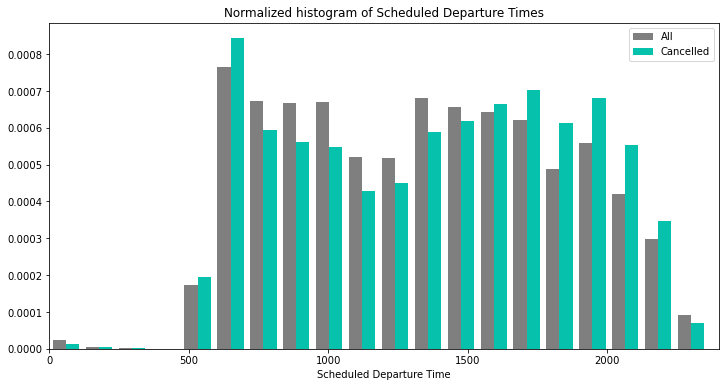

In [41]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([data['SCHEDULED_DEPARTURE'], cancelled_data['SCHEDULED_DEPARTURE']], density=1, bins=20, label=['All', 'Cancelled'], color=['#7f7f7f','#06C2AC'])

ax.set_xlim(0,2400)

ax.set_xlabel('Scheduled Departure Time')
ax.set_title('Normalized histogram of Scheduled Departure Times')

plt.legend()
plt.show()

Counts

In [22]:
cancelled_data['DISTANCE'].describe()

count    89884.000000
mean       662.942526
std        514.678775
min         21.000000
25%        296.000000
50%        532.500000
75%        868.000000
max       4962.000000
Name: DISTANCE, dtype: float64

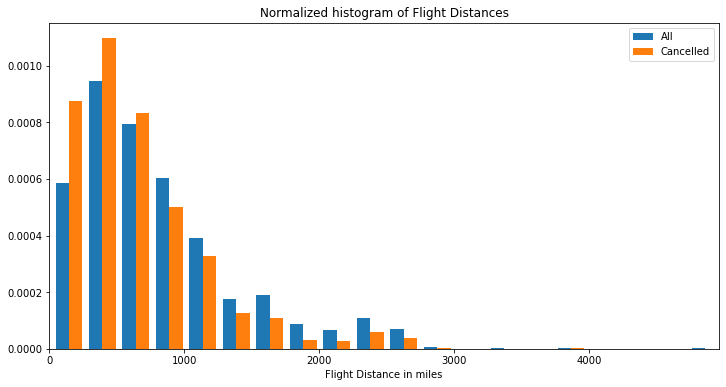

In [42]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([data['DISTANCE'], cancelled_data['DISTANCE']], density=1, bins=20, label=['All', 'Cancelled'])

ax.set_xlim(0,4962)
ax.set_xlabel('Flight Distance in miles')
ax.set_title('Normalized histogram of Flight Distances')

plt.legend()
plt.show()

In [45]:
cancelled_data['DIVERTED'].describe() #because of cancellation

count     89884
unique        1
top          No
freq      89884
Name: DIVERTED, dtype: object

In [46]:
cancelled_data['MONTH'].value_counts()

February     20517
January      11982
March        11002
June          9120
December      8063
May           5694
August        5052
July          4806
November      4599
April         4520
October       2454
September     2075
Name: MONTH, dtype: int64

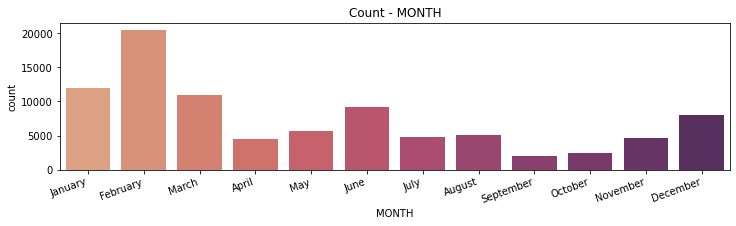

In [35]:
fig=plt.figure(figsize=(12,3))
sns.countplot(x='MONTH', data=cancelled_data, palette='flare')
plt.title('Count - MONTH')
fig.autofmt_xdate(rotation=20)
plt.show()

In [36]:
cancelled_data['DAY_OF_WEEK'].value_counts()

Monday       21073
Tuesday      15072
Sunday       13165
Thursday     12291
Wednesday    10729
Friday        8805
Saturday      8749
Name: DAY_OF_WEEK, dtype: int64

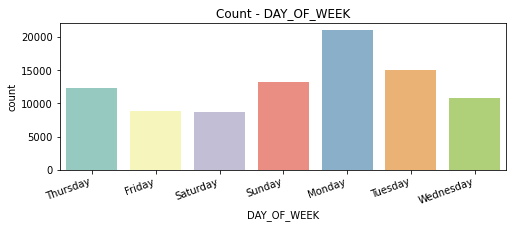

In [37]:
fig=plt.figure(figsize=(8,3))
sns.countplot(x='DAY_OF_WEEK', data=cancelled_data, palette="Set3")
plt.title('Count - DAY_OF_WEEK')
fig.autofmt_xdate(rotation=20)
plt.show()

In [38]:
cancelled_data['DAY'].value_counts().head()

27    6070
1     5320
2     4950
28    4903
5     4451
Name: DAY, dtype: int64

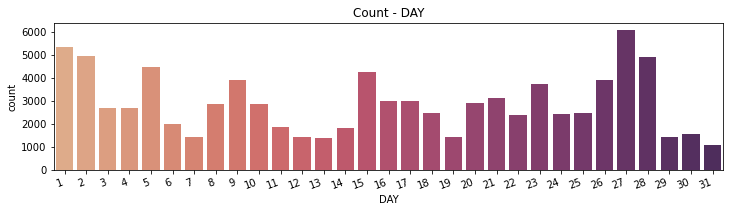

In [41]:
fig=plt.figure(figsize=(12,3))
sns.countplot(x='DAY', data=cancelled_data, palette='flare')
fig.autofmt_xdate(rotation=20)
plt.title('Count - DAY')
plt.show()

Cancellation reasons

In [45]:
cancelled_data['CANCELLATION_REASON'].value_counts()

Weather                48851
Airline/Carrier        25262
National Air System    15749
Security                  22
Name: CANCELLATION_REASON, dtype: int64

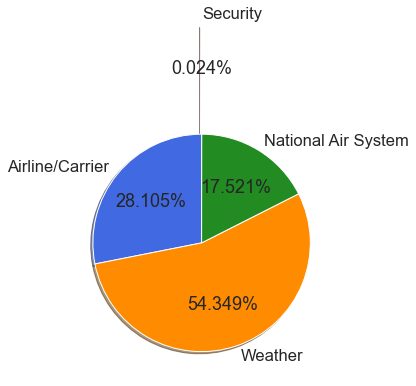

In [46]:
reasons = np.array([25262, 48851, 15749, 22])
mylabels = ["Airline/Carrier", "Weather", "National Air System", "Security"]
mycolors = ["#4169E1", "#FF8C00", "#228B22", "#8B0000"]
explode = (0, 0, 0, 1) 
fig1, ax1 = plt.subplots(figsize=(20,5))
ax1.pie(reasons,explode=explode, labels=mylabels,colors = mycolors, autopct='%1.3f%%',shadow=True, startangle=90)
plt.show()

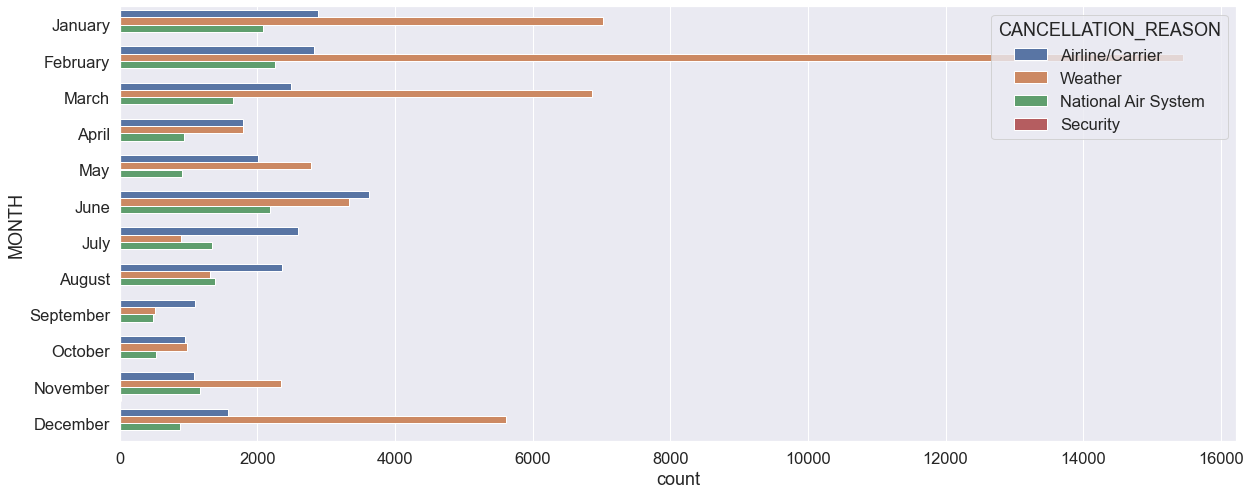

In [47]:
sns.set(font_scale=1.5, rc={"figure.figsize": (20, 8)})
sns.countplot(y="MONTH", hue="CANCELLATION_REASON", data=cancelled_data)
plt.show()

In [51]:
cancelled_data[cancelled_data['CANCELLATION_REASON']=='Airline/Carrier']['AIRLINE'].value_counts()

Southwest Airlines Co.          6122
Atlantic Southeast Airlines     3604
Skywest Airlines Inc.           3205
American Airlines Inc.          2879
United Air Lines Inc.           2870
American Eagle Airlines Inc.    2475
US Airways Inc.                 1007
JetBlue Airways                  883
Spirit Air Lines                 654
Delta Air Lines Inc.             594
Alaska Airlines Inc.             334
Frontier Airlines Inc.           308
Hawaiian Airlines Inc.           170
Virgin America                   157
Name: AIRLINE, dtype: int64

Taxi_out

In [72]:
cancelled_data['TAXI_OUT'].describe()

count    837.000000
mean      19.796894
std       14.084055
min        4.000000
25%       12.000000
50%       16.000000
75%       23.000000
max      146.000000
Name: TAXI_OUT, dtype: float64

In [70]:
def percentage(part, whole):
  return 100 * float(part)/float(whole)

In [54]:
percentage(837,89884)

0.9312002136086511

Delay

In [40]:
cancelled_data['DEPARTURE_DELAY'].describe()

count    3731.000000
mean       57.465559
std        95.535155
min       -25.000000
25%        -2.000000
50%        21.000000
75%        83.000000
max      1274.000000
Name: DEPARTURE_DELAY, dtype: float64

In [80]:
cancelled_data[cancelled_data['DEPARTURE_DELAY'] <= 0]['CANCELLATION_REASON'].describe()

count                1191
unique                  3
top       Airline/Carrier
freq                  597
Name: CANCELLATION_REASON, dtype: object

In [83]:
cancelled_data[(cancelled_data['DEPARTURE_DELAY'] <= 0) & (cancelled_data['CANCELLATION_REASON']== 'Security')]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY


In [55]:
cancelled_data[cancelled_data['DEPARTURE_DELAY'] > 0]['CANCELLATION_REASON'].describe()

count        2540
unique          4
top       Weather
freq         1262
Name: CANCELLATION_REASON, dtype: object

Airline

In [56]:
cancelled_data_airline = cancelled_data[(cancelled_data['DEPARTURE_DELAY'] > 0) & (cancelled_data['CANCELLATION_REASON']== 'Airline/Carrier')]

In [58]:
cancelled_data_airline['AIRLINE'].value_counts()

United Air Lines Inc.           200
American Eagle Airlines Inc.    138
Skywest Airlines Inc.           131
Atlantic Southeast Airlines     126
Southwest Airlines Co.          110
American Airlines Inc.          110
US Airways Inc.                  51
Delta Air Lines Inc.             31
JetBlue Airways                  30
Spirit Air Lines                 19
Frontier Airlines Inc.           18
Alaska Airlines Inc.             12
Virgin America                    9
Hawaiian Airlines Inc.            6
Name: AIRLINE, dtype: int64

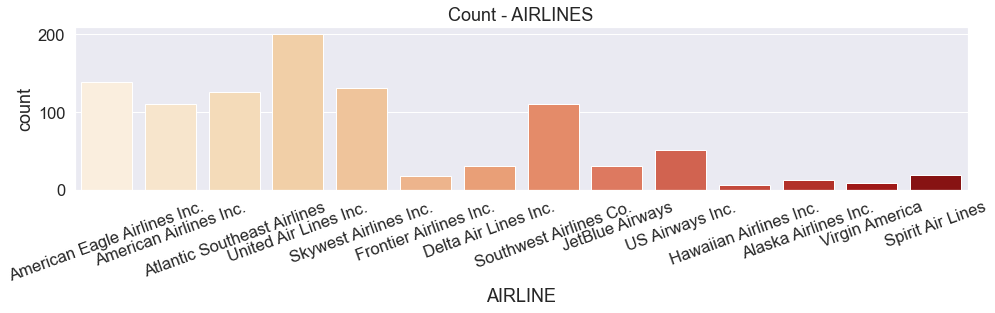

In [57]:
sns.set(font_scale=1.5, rc={"figure.figsize": (16, 3)})
cp=sns.countplot(x='AIRLINE', data=cancelled_data_airline, palette='OrRd')
plt.title('Count - AIRLINES')
plt.setp(cp.get_xticklabels(), rotation=20)
plt.show()

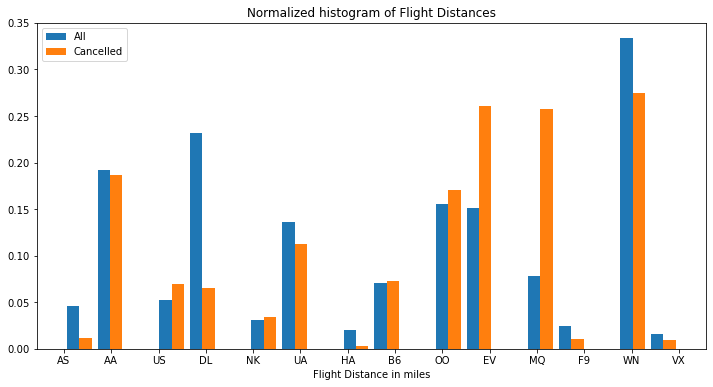

In [43]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([data['AIRLINE'], cancelled_data['AIRLINE']], density=1, bins=20, label=['All', 'Cancelled'])
ax.set_xlabel('Flight Distance in miles')
ax.set_title('Normalized histogram of Flight Distances')

plt.legend()
plt.show()

Airport

In [61]:
cancelled_data['ORIGIN_AIRPORT'].value_counts()

Chicago O'Hare International Airport                8548
Dallas/Fort Worth International Airport             6254
LaGuardia Airport (Marine Air Terminal)             4531
Newark Liberty International Airport                3110
Gen. Edward Lawrence Logan International Airport    2654
                                                    ... 
Cedar City Regional Airport                            1
13931                                                  1
13290                                                  1
14689                                                  1
Barnstable Municipal Airport                           1
Name: ORIGIN_AIRPORT, Length: 525, dtype: int64

In [70]:
data_airports_o= data.loc[lambda data: data.ORIGIN_AIRPORT.str.len()> 5] #without unknown origin airports

In [72]:
data_airports_o['ORIGIN_AIRPORT'].value_counts()

Hartsfield-Jackson Atlanta International Airport    346836
Chicago O'Hare International Airport                285884
Dallas/Fort Worth International Airport             239551
Denver International Airport                        196055
Los Angeles International Airport                   194673
                                                     ...  
Barnstable Municipal Airport                            83
Gustavus Airport                                        77
Dillingham Airport                                      77
King Salmon Airport                                     63
Ithaca Tompkins Regional Airport                        34
Name: ORIGIN_AIRPORT, Length: 322, dtype: int64

In [73]:
pd.crosstab(data_airports_o['ORIGIN_AIRPORT'],data_airports_o['CANCELLED'], normalize = True)

CANCELLED,No,Yes
ORIGIN_AIRPORT,,
Aberdeen Regional Airport,0.000124,1.500118e-06
Abilene Regional Airport,0.000419,1.818893e-05
Abraham Lincoln Capital Airport,0.000285,1.218846e-05
Adak Airport,0.000017,1.312603e-06
Akron-Canton Regional Airport,0.001125,1.875147e-05
...,...,...
Yakutat Airport,0.000123,9.375737e-07
Yampa Valley Airport (Yampa Valley Regional),0.000129,3.000236e-06
Yeager Airport,0.000436,1.106337e-05


In [ ]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([data['AIRLINE'], cancelled_data['AIRLINE']], density=1, bins=20, label=['All', 'Cancelled'])
ax.set_xlabel('Flight Distance in miles')
ax.set_title('Normalized histogram of Flight Distances')

plt.legend()
plt.show()

In [64]:
cancelled_data['DESTINATION_AIRPORT'].value_counts()

Chicago O'Hare International Airport                9273
Dallas/Fort Worth International Airport             6749
LaGuardia Airport (Marine Air Terminal)             4418
Newark Liberty International Airport                3350
Hartsfield-Jackson Atlanta International Airport    2715
                                                    ... 
14520                                                  1
12884                                                  1
10469                                                  1
13076                                                  1
10158                                                  1
Name: DESTINATION_AIRPORT, Length: 513, dtype: int64

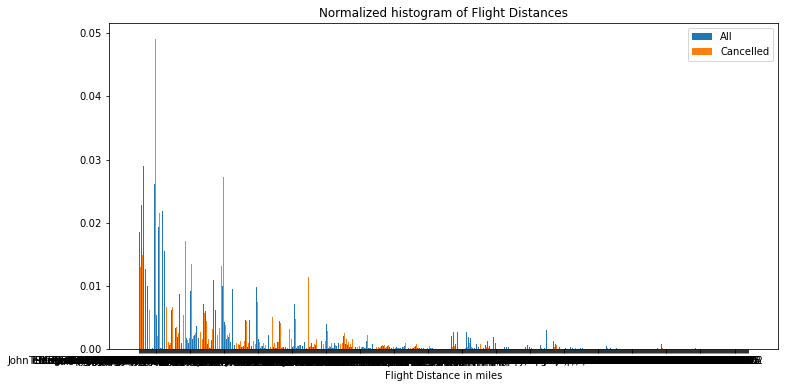

In [76]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([data['ORIGIN_AIRPORT'], cancelled_data['ORIGIN_AIRPORT']], density=1, bins=322, label=['All', 'Cancelled'])
ax.set_xlabel('Flight Distance in miles')
ax.set_title('Normalized histogram of Flight Distances')

plt.legend()
plt.show()

In [61]:
d1 = cancelled_data[['ORIGIN_AIRPORT','DESTINATION_AIRPORT']]
oa1 = d1.loc[:, 'ORIGIN_AIRPORT']
da1 = d1.loc[:, 'DESTINATION_AIRPORT']
list_oa1 = oa1.to_list()
list_da1 = da1.to_list()

In [62]:
l = []
for i in range(len(list_oa1)):
    for j in range(len(list_da1)):
        if i==j:
            l.append((list_oa1[i],list_da1[j]))
        else:
            continue
counter1={}
for i in l:
    counter1[i] = counter1.get(i,0)+1
sorted([(freq,par) for par,freq in counter1.items()],reverse=True)[:3]

[(443,
  ('Gen. Edward Lawrence Logan International Airport',
   'LaGuardia Airport (Marine Air Terminal)')),
 (441,
  ('LaGuardia Airport (Marine Air Terminal)',
   'Gen. Edward Lawrence Logan International Airport')),
 (435,
  ('LaGuardia Airport (Marine Air Terminal)',
   "Chicago O'Hare International Airport"))]

In [92]:
LA = realised_data[realised_data['ORIGIN_AIRPORT']=='LaGuardia Airport (Marine Air Terminal)']

In [93]:
LA[['DISTANCE','ELAPSED_TIME','TAXI_IN','TAXI_OUT','AIR_TIME','DEPARTURE_DELAY','ARRIVAL_DELAY']].describe()

,DISTANCE,ELAPSED_TIME,TAXI_IN,TAXI_OUT,AIR_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
count,95074.000000,94834.000000,95051.000000,95074.000000,94834.000000,95074.000000,94834.000000
mean,802.650241,154.209999,7.818918,26.721596,119.685788,13.184888,5.628140
std,383.367590,52.584441,6.281294,14.448439,50.614141,43.024546,47.282496
min,96.000000,40.000000,1.000000,1.000000,19.000000,-28.000000,-73.000000
25%,502.000000,116.000000,4.000000,17.000000,81.000000,-5.000000,-20.000000
50%,762.000000,153.000000,6.000000,23.000000,117.000000,-2.000000,-7.000000
75%,1076.000000,186.000000,9.000000,33.000000,151.000000,11.000000,13.000000
max,1894.000000,428.000000,179.000000,177.000000,311.000000,1166.000000,1170.000000


In [94]:
GE_LA = realised_data[(realised_data['ORIGIN_AIRPORT']=='Gen. Edward Lawrence Logan International Airport') & (realised_data['DESTINATION_AIRPORT']=='LaGuardia Airport (Marine Air Terminal)')]

In [96]:
GE_LA[['DISTANCE','ELAPSED_TIME','TAXI_IN','TAXI_OUT','AIR_TIME','DEPARTURE_DELAY','ARRIVAL_DELAY']].describe()

,DISTANCE,ELAPSED_TIME,TAXI_IN,TAXI_OUT,AIR_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
count,6653.0,6646.000000,6651.000000,6653.000000,6646.000000,6653.000000,6646.000000
mean,184.0,79.191544,8.636295,24.651586,45.905658,9.890876,9.552362
std,0.0,15.060546,6.058849,12.603381,5.865919,38.855184,43.306070
min,184.0,52.000000,2.000000,5.000000,34.000000,-15.000000,-37.000000
25%,184.0,70.000000,5.000000,17.000000,42.000000,-6.000000,-13.000000
50%,184.0,76.000000,7.000000,22.000000,45.000000,-3.000000,-3.000000
75%,184.0,85.000000,10.000000,29.000000,49.000000,4.000000,13.000000
max,184.0,209.000000,117.000000,149.000000,100.000000,578.000000,574.000000


In [97]:
LA_GE = realised_data[(realised_data['ORIGIN_AIRPORT']=='LaGuardia Airport (Marine Air Terminal)') & (realised_data['DESTINATION_AIRPORT']=='Gen. Edward Lawrence Logan International Airport')]

In [98]:
LA_GE[['DISTANCE','ELAPSED_TIME','TAXI_IN','TAXI_OUT','AIR_TIME','DEPARTURE_DELAY','ARRIVAL_DELAY']].describe()

,DISTANCE,ELAPSED_TIME,TAXI_IN,TAXI_OUT,AIR_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
count,6659.0,6658.000000,6659.000000,6659.000000,6658.000000,6659.000000,6658.000000
mean,184.0,72.629769,7.304700,27.312359,38.011114,9.919958,7.817513
std,0.0,15.506279,3.242265,14.042303,5.165217,34.972612,39.041069
min,184.0,46.000000,1.000000,7.000000,21.000000,-17.000000,-48.000000
25%,184.0,62.000000,5.000000,17.000000,34.000000,-6.000000,-14.000000
50%,184.0,69.000000,7.000000,24.000000,37.000000,-2.000000,-4.000000
75%,184.0,79.000000,9.000000,34.000000,41.000000,7.000000,14.000000
max,184.0,231.000000,53.000000,143.000000,91.000000,385.000000,394.000000


In [99]:
GE_LA['AIRLINE'].value_counts()

Delta Air Lines Inc.      3098
US Airways Inc.           1941
American Airlines Inc.    1614
Name: AIRLINE, dtype: int64

## REALIZED

In [24]:
realized_data = data[data['CANCELLED']=='No']

In [66]:
data[data['CANCELLED']=='No'].describe()

,YEAR,DAY,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,...,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5729195.0,5.729195e+06,5.729195e+06,5.729195e+06,5.729195e+06,5.729195e+06,5.729195e+06,5.729195e+06,5.729194e+06,5.714008e+06,...,5.726566e+06,5.726566e+06,5.729195e+06,5.726566e+06,5.714008e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,1.570848e+01,2.164753e+03,1.328890e+03,1.335102e+03,9.338837e+00,1.607112e+01,1.357142e+03,1.419480e+02,1.370062e+02,...,1.471469e+03,7.434971e+00,1.493315e+03,1.476491e+03,4.407057e+00,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,8.774635e+00,1.754924e+03,4.834692e+02,4.963902e+02,3.699246e+01,8.894483e+00,4.979969e+02,7.533501e+01,7.421107e+01,...,5.221879e+02,5.638548e+00,5.068360e+02,5.263197e+02,3.927130e+01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,1.800000e+01,1.400000e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,8.000000e+00,7.280000e+02,9.160000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,8.600000e+01,8.200000e+01,...,1.054000e+03,4.000000e+00,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,1.600000e+01,1.681000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,1.230000e+02,1.180000e+02,...,1.509000e+03,6.000000e+00,1.520000e+03,1.512000e+03,-5.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,2.300000e+01,3.212000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,1.740000e+02,1.680000e+02,...,1.911000e+03,9.000000e+00,1.917000e+03,1.917000e+03,8.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,3.100000e+01,9.320000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,7.180000e+02,7.660000e+02,...,2.400000e+03,2.480000e+02,2.400000e+03,2.400000e+03,1.971000e+03,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [71]:
percentage(5729195,5819079)

98.45535693878705

Cleaning data

In [25]:
realized_data.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               1
ELAPSED_TIME             15187
AIR_TIME                 15187
DISTANCE                     0
WHEELS_ON                 2629
TAXI_IN                   2629
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME              2629
ARRIVAL_DELAY            15187
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4665756
SECURITY_DELAY         4665756
AIRLINE_DELAY          4665756
LATE_AIRCRAFT_DELAY    4665756
WEATHER_DELAY          4665756
dtype: int64

In [72]:
percentage(4665756,5729195)

81.43824743266724

In [26]:
realized_data = realized_data.drop("CANCELLATION_REASON", axis=1)

Counts

In [27]:
realized_data['MONTH'].value_counts()

July         515912
August       505484
June         494777
March        493310
May          491299
October      483711
April        480631
December     471167
November     463373
September    462871
January      457986
February     408674
Name: MONTH, dtype: int64

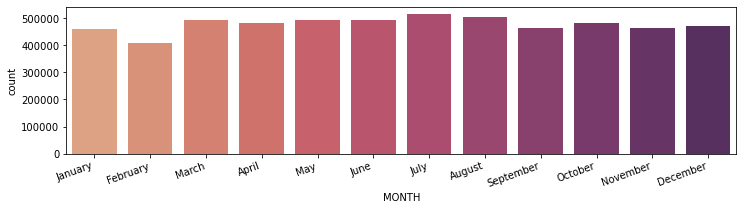

In [28]:
fig=plt.figure(figsize=(12,3))
sns.countplot(x='MONTH', data=realized_data, palette='flare')
fig.autofmt_xdate(rotation=20)
plt.show()

In [73]:
columns_delay = ['DEPARTURE_DELAY','ARRIVAL_DELAY']
realized_data_ad_delay_m = realized_data.groupby(['MONTH'])[columns_delay].agg(['mean','count'])
realized_data_ad_delay_m

DEPARTURE_DELAY         ARRIVAL_DELAY        
                     mean   count          mean   count
MONTH                                                  
April            7.684097  480631      3.163190  479251
August           9.911056  505484      4.607372  503956
December        11.738865  471167      6.092903  469717
February        11.814630  408674      8.320500  407663
January          9.732780  457986      5.813583  457013
July            11.374876  515912      6.431775  514384
June            13.942455  494777      9.601590  492847
March            9.627705  493310      4.920673  492138
May              9.418682  491299      4.485019  489641
November         6.922445  463373      1.100784  462367
October          4.971586  483711     -0.780390  482878
September        4.813419  462871     -0.772571  462153

In [29]:
realized_data['DAY_OF_WEEK'].value_counts()

Thursday     860230
Friday       853404
Wednesday    845168
Monday       844470
Tuesday      829528
Sunday       804599
Saturday     691796
Name: DAY_OF_WEEK, dtype: int64

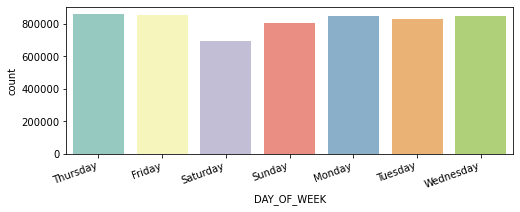

In [30]:
fig=plt.figure(figsize=(8,3))
sns.countplot(x='DAY_OF_WEEK', data=realized_data, palette="Set3")
fig.autofmt_xdate(rotation=20)
plt.show()

In [31]:
realized_data['DAY'].value_counts()

13    193707
16    192906
20    192797
19    191861
8     191115
2     191036
9     190322
22    190320
23    189806
12    189447
6     189243
18    188905
11    188871
15    188699
17    188314
4     188200
3     187319
14    186796
28    186498
10    186439
21    186280
7     186153
27    185850
5     185315
25    184840
1     184157
26    183482
24    182605
29    177986
30    177217
31    102709
Name: DAY, dtype: int64

Delays

In [32]:
columns_delay = ['DEPARTURE_DELAY','ARRIVAL_DELAY']
realized_data_ad_delay = realized_data.groupby(['DAY_OF_WEEK'])[columns_delay].agg(['mean','count'])
realized_data_ad_delay

DEPARTURE_DELAY         ARRIVAL_DELAY        
                       mean   count          mean   count
DAY_OF_WEEK                                              
Friday             9.404951  853404      4.764079  851387
Monday            10.821282  844470      6.002063  841794
Saturday           7.788214  691796      1.852892  689745
Sunday             9.367854  804599      3.958293  802555
Thursday           9.925353  860230      5.668334  857886
Tuesday            9.142979  829528      4.246041  827399
Wednesday          8.627734  845168      3.845468  843242

In [72]:
columns_delay = ['DEPARTURE_DELAY','ARRIVAL_DELAY']
data_ad_delay = realised_data.groupby(['DAY'])[columns_delay].agg(['mean','count'])
data_ad_delay

DEPARTURE_DELAY         ARRIVAL_DELAY        
               mean   count          mean   count
DAY                                              
1         10.480156  184157      5.685146  183574
2         10.580283  191036      6.255026  190514
3          9.491466  187319      4.997517  186877
4          9.034129  188200      4.361081  187833
5          9.107773  185315      4.366274  184815
6          8.294531  189243      3.041174  188929
7          6.893340  186153      1.401846  185760
8          9.846522  191115      4.909829  190550
9         10.242999  190322      5.698791  189659
10         9.912626  186439      5.290148  185895
11         8.548830  188871      3.448195  188340
12         7.374680  189447      2.291553  189091
13         8.315239  193707      3.025539  193233
14         7.931760  186796      2.595165  186286
15         9.892204  188699      4.781913  188186
16         8.770417  192906      3.947383  192466
17        11.203384  188314      6.424874  187750
18        12.880395  188905      9.034393  188322
19         9.217366  191861      4.040942  191517
20        10.407895  192797      5.718891  192253
21         9.544809  186280      4.756830  185796
22         8.526219  190320      3.432002  189939
23        11.203034  189806      6.336568  189213
24         8.949399  182605      3.394050  182096
25         7.261372  184840      2.160575  184275
26         9.862254  183482      5.389968  182784
27        10.033414  185850      5.405071  185355
28         8.411763  186498      3.005407  186050
29         7.826672  177986      2.267092  177658
30        10.260003  177217      5.320301  176709
31         8.919841  102709      3.132691  102283

In [33]:
day_of_monthD = realized_data[['DAY','DEPARTURE_DELAY']].groupby('DAY').agg(['mean','count'])
day_of_monthD.columns = ['mean','count']
day_of_monthA = realized_data[['DAY','ARRIVAL_DELAY']].groupby('DAY').agg(['mean','count'])
day_of_monthA.columns = ['mean','count']

In [34]:
mean_daysD=np.array(day_of_monthD['mean'])
mean_daysA=np.array(day_of_monthA['mean'])

In [35]:
days=np.linspace(1, 31, 31)

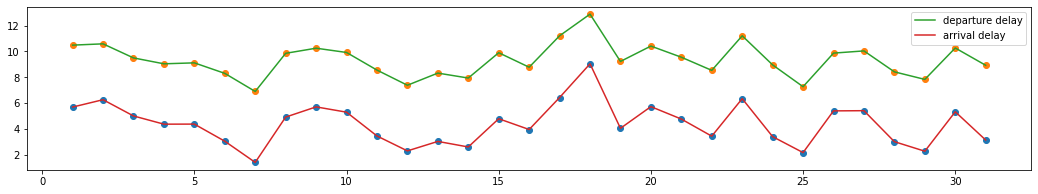

In [37]:
fmonth1 = interpolate.interp1d(days, mean_daysD, kind='linear')
mean_daysD = fmonth1(days)
fmonth2 = interpolate.interp1d(days, mean_daysA, kind='linear')
mean_daysA = fmonth2(days)
plt.figure(figsize=(18,3))
plt.plot(days, mean_daysA, 'o')
plt.plot(days, mean_daysD, 'o')
plt.plot(days, mean_daysD, label='departure delay')
plt.plot(days, mean_daysA, label='arrival delay')
plt.legend()
plt.show()

Delay reasons

In [38]:
realized_data['AIR_SYSTEM_DELAY'].count() #every column with delay reason has the same count of not NaN values

1063439

In [39]:
realized_data['AIR_SYSTEM_DELAY'].value_counts()

0.0       498613
1.0        28003
15.0       23199
2.0        22981
3.0        21446
           ...  
482.0          1
481.0          1
478.0          1
477.0          1
1101.0         1
Name: AIR_SYSTEM_DELAY, Length: 570, dtype: int64

In [40]:
realized_data['AIR_SYSTEM_DELAY'].mean()

13.480568231934319

In [41]:
realized_data['SECURITY_DELAY'].value_counts()

0.0      1059955
15.0         158
8.0          127
10.0         125
12.0         124
          ...   
129.0          1
133.0          1
138.0          1
140.0          1
171.0          1
Name: SECURITY_DELAY, Length: 154, dtype: int64

In [42]:
realized_data['SECURITY_DELAY'].mean()

0.07615387436420895

In [43]:
realized_data['AIRLINE_DELAY'].value_counts()

0.0       493417
1.0        21319
2.0        21211
3.0        20656
4.0        20184
           ...  
932.0          1
934.0          1
935.0          1
936.0          1
1878.0         1
Name: AIRLINE_DELAY, Length: 1067, dtype: int64

In [44]:
realized_data['AIRLINE_DELAY'].mean()

18.969546913363153

In [45]:
realized_data['LATE_AIRCRAFT_DELAY'].value_counts()

0.0      506486
15.0      14522
16.0      13824
17.0      12908
18.0      12259
          ...  
606.0         1
608.0         1
614.0         1
620.0         1
939.0         1
Name: LATE_AIRCRAFT_DELAY, Length: 695, dtype: int64

In [46]:
realized_data['LATE_AIRCRAFT_DELAY'].mean()

23.472837652183152

In [47]:
realized_data['WEATHER_DELAY'].value_counts()

0.0      998723
6.0        1649
8.0        1580
7.0        1537
10.0       1498
          ...  
380.0         1
590.0         1
592.0         1
594.0         1
987.0         1
Name: WEATHER_DELAY, Length: 632, dtype: int64

In [48]:
realized_data['WEATHER_DELAY'].mean()

2.915289922600168

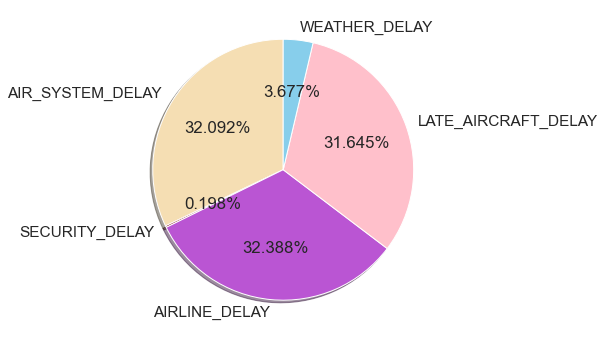

In [86]:
#we have 1063439 not NaN rows
#now we will put calculated no zero values in each column and make pie chart
reasons2 = np.array([564826, 3484, 570022, 556953, 64716]) #element in array = 1063439 - number_of_zero_values
mylabels = ["AIR_SYSTEM_DELAY","SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY"]
mycolors = ["#F5DEB3", "#800000", "#BA55D3", "#FFC0CB", "#87CEEB"]
fig1, ax1 = plt.subplots(figsize=(20,6))
ax1.pie(reasons2, labels=mylabels,colors = mycolors, autopct='%1.3f%%',shadow=True, startangle=90)
plt.show()

 TAXI_IN i TAXI_OUT

In [50]:
realized_data[['TAXI_IN','TAXI_OUT']].mean()

TAXI_IN      7.434971
TAXI_OUT    16.071118
dtype: float64

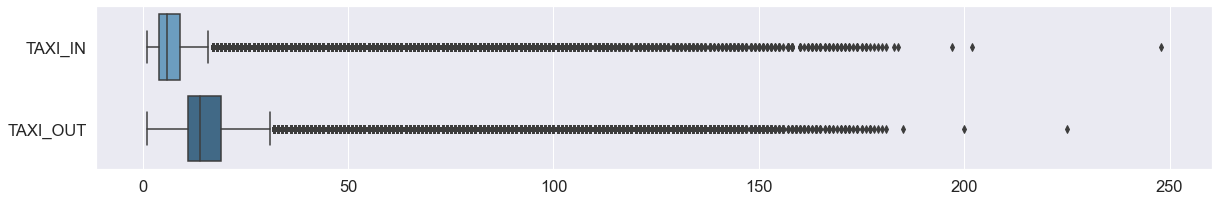

In [51]:
sns.set(font_scale=1.5, rc={"figure.figsize": (20, 3)})
sns.boxplot(data=realized_data[['TAXI_IN','TAXI_OUT']], orient = "h", palette = "Blues_d")
plt.show()

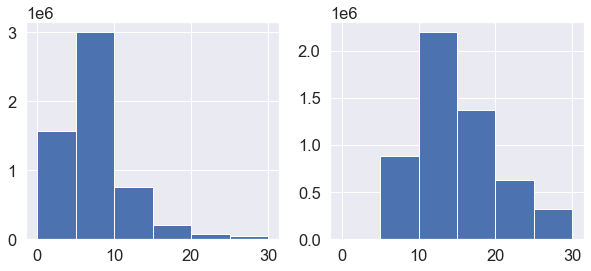

In [52]:
taxi_in = realized_data.loc[:, 'TAXI_IN']
taxi_out = realized_data.loc[:, 'TAXI_OUT']

taxi_in_list = taxi_in.to_list()
taxi_out_list = taxi_out.to_list()

i = np.array(taxi_in_list)
o = np.array(taxi_out_list)

fig=plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(i, bins = [0,5,10,15,20,25,30]) 

plt.subplot(1,2,2)
plt.hist(o, bins = [0,5,10,15,20,25,30]) 


plt.show()

Diverted

In [54]:
realized_data[realized_data['DIVERTED']=='Yes'][['DEPARTURE_DELAY','ARRIVAL_DELAY','TAXI_OUT','TAXI_IN']].describe()

,DEPARTURE_DELAY,ARRIVAL_DELAY,TAXI_OUT,TAXI_IN
count,15187.000000,0.0,15187.000000,12558.000000
mean,25.891815,NaN,18.185751,10.122870
std,62.847855,NaN,12.455037,11.177663
min,-35.000000,NaN,1.000000,1.000000
25%,-3.000000,NaN,11.000000,5.000000
50%,2.000000,NaN,15.000000,7.000000
75%,27.000000,NaN,21.000000,11.000000
max,1205.000000,NaN,171.000000,180.000000


In [91]:
realized_data[realized_data['DIVERTED']=='Yes']['MONTH'].value_counts()

June         1930
May          1658
August       1528
July         1528
December     1450
April        1380
March        1172
February     1011
November     1006
January       973
October       833
September     718
Name: MONTH, dtype: int64

Airlines

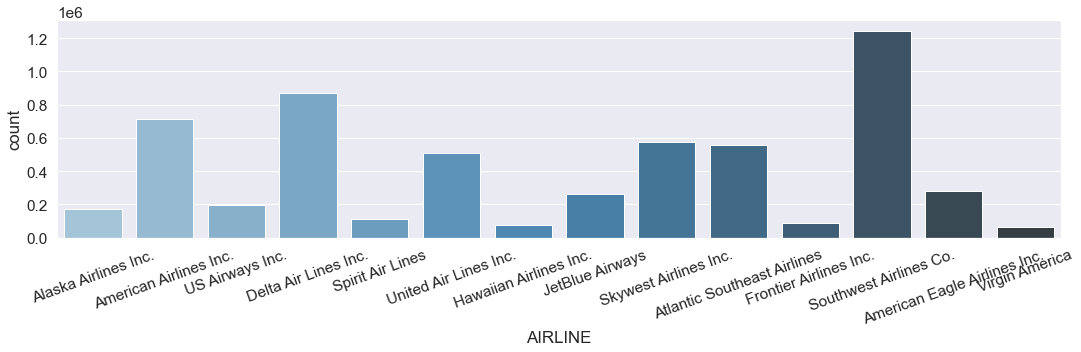

In [56]:
sns.set(font_scale=1.4, rc={"figure.figsize": (18,4)})
cp=sns.countplot(x='AIRLINE', data=realized_data,palette = 'Blues_d') 
plt.setp(cp.get_xticklabels(), rotation=20)
plt.show()

In [57]:
columns = ['DEPARTURE_DELAY','ARRIVAL_DELAY']
data_ad = realized_data.groupby(['AIRLINE'])[columns].describe(percentiles=[])
data_ad

DEPARTURE_DELAY                                   \
                                       count       mean        std   min  50%   
AIRLINE                                                                         
Alaska Airlines Inc.                171852.0   1.778455  26.350540 -82.0 -4.0   
American Airlines Inc.              715065.0   8.864029  41.802144 -68.0 -2.0   
American Eagle Airlines Inc.        279607.0  10.014910  40.376758 -36.0 -2.0   
Atlantic Southeast Airlines         556746.0   8.663310  38.541665 -55.0 -3.0   
Delta Air Lines Inc.                872057.0   7.354815  36.240041 -61.0 -1.0   
Frontier Airlines Inc.               90248.0  13.317470  49.450187 -46.0 -2.0   
Hawaiian Airlines Inc.               76101.0   0.483489  24.546830 -27.0 -4.0   
JetBlue Airways                     262772.0  11.499049  38.476296 -31.0 -2.0   
Skywest Airlines Inc.               578393.0   7.768222  37.745172 -56.0 -3.0   
Southwest Airlines Co.             1245812.0  10.571461  30.715318 -28.0  0.0   
Spirit Air Lines                    115375.0  15.911281  43.710265 -37.0 -1.0   
US Airways Inc.                     194648.0   6.110538  28.942212 -35.0 -2.0   
United Air Lines Inc.               509150.0  14.379658  41.917885 -40.0  1.0   
Virgin America                       61369.0   9.006274  32.378847 -24.0 -1.0   

                                     ARRIVAL_DELAY                        \
                                 max         count       mean        std   
AIRLINE                                                                    
Alaska Airlines Inc.           963.0      171439.0  -0.976563  28.678804   
American Airlines Inc.        1988.0      712935.0   3.451372  44.266750   
American Eagle Airlines Inc.  1544.0      278791.0   6.457873  44.458112   
Atlantic Southeast Airlines   1236.0      554752.0   6.585379  40.682366   
Delta Air Lines Inc.          1289.0      870275.0   0.186754  38.439225   
Frontier Airlines Inc.        1112.0       90090.0  12.504706  51.561753   
Hawaiian Airlines Inc.        1433.0       76041.0   2.023093  25.714939   
JetBlue Airways               1006.0      262042.0   6.677861  41.400552   
Skywest Airlines Inc.         1378.0      576814.0   5.845652  39.257694   
Southwest Airlines Co.         665.0     1242403.0   4.374964  32.774001   
Spirit Air Lines               836.0      115193.0  14.471800  45.903410   
US Airways Inc.                759.0      194223.0   3.706209  32.378743   
United Air Lines Inc.         1314.0      507762.0   5.431594  44.081214   
Virgin America                 644.0       61248.0   4.737706  35.621579   

                                                 
                               min  50%     max  
AIRLINE                                          
Alaska Airlines Inc.         -82.0 -5.0   950.0  
American Airlines Inc.       -87.0 -6.0  1971.0  
American Eagle Airlines Inc. -63.0 -6.0  1528.0  
Atlantic Southeast Airlines  -64.0 -4.0  1223.0  
Delta Air Lines Inc.         -79.0 -8.0  1274.0  
Frontier Airlines Inc.       -73.0 -1.0  1101.0  
Hawaiian Airlines Inc.       -67.0 -2.0  1467.0  
JetBlue Airways              -76.0 -5.0  1002.0  
Skywest Airlines Inc.        -69.0 -4.0  1372.0  
Southwest Airlines Co.       -73.0 -4.0   659.0  
Spirit Air Lines             -60.0  0.0   833.0  
US Airways Inc.              -87.0 -4.0   750.0  
United Air Lines Inc.        -81.0 -6.0  1294.0  
Virgin America               -81.0 -3.0   651.0

Airports

In [58]:
realized_data_airports_o= realized_data.loc[lambda realized_data: realized_data.ORIGIN_AIRPORT.str.len()> 5]

In [60]:
realized_data_airports_o['ORIGIN_AIRPORT'].value_counts()

Hartsfield-Jackson Atlanta International Airport    344279
Chicago O'Hare International Airport                277336
Dallas/Fort Worth International Airport             233297
Denver International Airport                        193932
Los Angeles International Airport                   192509
                                                     ...  
St. Cloud Regional Airport                              78
Dillingham Airport                                      77
Gustavus Airport                                        76
King Salmon Airport                                     63
Ithaca Tompkins Regional Airport                        30
Name: ORIGIN_AIRPORT, Length: 322, dtype: int64

In [61]:
realized_data_airports_o['ORIGIN_AIRPORT'].describe()

count                                              5245484
unique                                                 322
top       Hartsfield-Jackson Atlanta International Airport
freq                                                344279
Name: ORIGIN_AIRPORT, dtype: object

In [62]:
data_taxi_out=realized_data_airports_o[['ORIGIN_AIRPORT','TAXI_OUT']].groupby('ORIGIN_AIRPORT').mean()

In [63]:
data_taxi_out.sort_values(by=['TAXI_OUT'])

,TAXI_OUT
ORIGIN_AIRPORT,
Canyonlands Field,6.512195
Kodiak Airport,6.574371
Wiley Post-Will Rogers Memorial Airport,6.798309
Deadhorse Airport (Prudhoe Bay Airport),7.097969
Valdez Airport,7.100000
...,...
Sloulin Field International Airport,20.996419
Philadelphia International Airport,21.709609
Ithaca Tompkins Regional Airport,22.533333


In [64]:
realized_data_airports_o['DESTINATION_AIRPORT'].describe()

count                                              5245484
unique                                                 322
top       Hartsfield-Jackson Atlanta International Airport
freq                                                344189
Name: DESTINATION_AIRPORT, dtype: object

In [65]:
realized_data_airports_o['DESTINATION_AIRPORT'].value_counts()

Hartsfield-Jackson Atlanta International Airport    344189
Chicago O'Hare International Airport                276633
Dallas/Fort Worth International Airport             232833
Denver International Airport                        193700
Los Angeles International Airport                   192437
                                                     ...  
St. Cloud Regional Airport                              77
Dillingham Airport                                      77
Gustavus Airport                                        76
King Salmon Airport                                     63
Ithaca Tompkins Regional Airport                        31
Name: DESTINATION_AIRPORT, Length: 322, dtype: int64

In [66]:
realized_data['DESTINATION_AIRPORT'].describe()

count                                              5729195
unique                                                 629
top       Hartsfield-Jackson Atlanta International Airport
freq                                                344189
Name: DESTINATION_AIRPORT, dtype: object

In [67]:
data_taxi_in=realized_data_airports_o[['DESTINATION_AIRPORT','TAXI_IN']].groupby('DESTINATION_AIRPORT').mean()

In [68]:
data_taxi_in.sort_values(by=['TAXI_IN'])

,TAXI_IN
DESTINATION_AIRPORT,
Valdez Airport,2.412060
Toledo Express Airport,2.648169
Canyonlands Field,2.741463
Coastal Carolina Regional Airport (Craven County Regional),2.784071
Albert J. Ellis Airport,3.015138
...,...
Charlotte Douglas International Airport,9.628386
Newark Liberty International Airport,9.735359
Dallas/Fort Worth International Airport,11.563057


## Random day

In [99]:
import random
random_month_int = random.randint(1, 12)
months_dict = {1: "January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}
random_month_str = months_dict[random_month_int]

if random_month_str=="February":
    random_day = random.randint(1,28)
elif (random_month_str=="April") or (random_month_str=="June") or (random_month_str=="September") or (random_month_str=="November"):
    random_day = random.randint(1,30)
else:
    random_day = random.randint(1,31)
    
r_month = realized_data.loc[realized_data['MONTH'] == random_month_str]


r_day = r_month[r_month['DAY'] == random_day]

In [100]:
print("Your random day is "+str(random_day)+"."+random_month_str+" 2015.")

Your random day is 16.May 2015.


In [101]:
r_day[['DISTANCE','ELAPSED_TIME','TAXI_IN','TAXI_OUT','AIR_TIME','DEPARTURE_DELAY','ARRIVAL_DELAY','ORIGIN_AIRPORT','DESTINATION_AIRPORT']].describe()

,DISTANCE,ELAPSED_TIME,TAXI_IN,TAXI_OUT,AIR_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
count,13352.000000,13321.000000,13350.000000,13352.000000,13321.000000,13352.000000,13321.000000
mean,856.088376,139.952931,7.106217,14.984946,117.869379,4.815458,-0.469259
std,623.140875,76.555995,5.100543,8.179233,74.614344,32.178251,34.236452
min,31.000000,22.000000,1.000000,2.000000,8.000000,-26.000000,-55.000000
25%,399.000000,83.000000,4.000000,10.000000,62.000000,-5.000000,-14.000000
50%,687.000000,122.000000,6.000000,13.000000,100.000000,-2.000000,-6.000000
75%,1096.000000,171.000000,8.000000,17.000000,147.000000,3.000000,4.000000
max,4983.000000,650.000000,172.000000,142.000000,612.000000,1324.000000,1318.000000


In [102]:
r_day[['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT']].describe()

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT
count,13352,13352,13352
unique,14,295,294
top,Southwest Airlines Co.,Hartsfield-Jackson Atlanta International Airport,Hartsfield-Jackson Atlanta International Airport
freq,2858,895,901


In [103]:
d = r_day[['ORIGIN_AIRPORT','DESTINATION_AIRPORT']]
oa = d.loc[:, 'ORIGIN_AIRPORT']
da = d.loc[:, 'DESTINATION_AIRPORT']

In [104]:
list_oa = oa.to_list()
list_da = da.to_list()

In [105]:
l = []
for i in range(len(list_oa)):
    for j in range(len(list_da)):
        if i==j:
            l.append((list_oa[i],list_da[j]))
        else:
            continue
counter={}
for i in l:
    counter[i] = counter.get(i,0)+1
sorted([(freq,par) for par,freq in counter.items()],reverse=True)[:4]

[(30,
  ('San Francisco International Airport',
   'Los Angeles International Airport')),
 (29,
  ('Los Angeles International Airport',
   'San Francisco International Airport')),
 (29,
  ('John F. Kennedy International Airport\xa0(New York International Airport)',
   'Los Angeles International Airport')),
 (28,
  ('Los Angeles International Airport',
   'John F. Kennedy International Airport\xa0(New York International Airport)'))]